In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import time
import scipy.signal as ss

In [33]:
def array_steering_vector(array,DOA):
    N = array.shape
    v = np.exp(1j*2*np.pi*array*np.sin(DOA))
    return v/np.sqrt(N)

In [34]:
def music(CovMat,L,N,array,Angles):
    # CovMat is the signal covariance matrix, L is the number of sources, N is the number of antennas
    # array holds the positions of antenna elements
    # Angles are the grid of directions in the azimuth angular domain
    _,V = LA.eig(CovMat)
    Qn  = V[:,L:N]
    numAngles = Angles.size
    pspectrum = np.zeros(numAngles)
    for i in range(numAngles):
        av = array_steering_vector(array,Angles[i])
        pspectrum[i] = 1/LA.norm((Qn.conj().transpose()@av))
    psindB    = np.log10(10*pspectrum/pspectrum.min())
    DoAsMUSIC,_= ss.find_peaks(psindB,height=1.35, distance=1.5)
    return DoAsMUSIC,psindB
np.random.seed(6)

In [35]:
lamda = 150 # wavelength
L = 2  # number of sources
N = 10  # number of ULA elements 
snr = -5 # signal to noise ratio
array = np.linspace(0,(N-1)/2,N)
Samples=10000

In [36]:
DOAs=[]
for i in range(Samples):
    DOA = np.pi*(np.random.rand(L)-1/2)# random source directions
    DOAs.append(DOA)
    
noise = np.random.randn(L) + np.random.randn(L)*1j # random source powers
noise = np.sqrt(1/2)*noise


In [37]:
Angles = np.linspace(-np.pi/2,np.pi/2,360)
numAngles = Angles.size
numAngles

360

In [38]:
snapshots = 100
X = np.zeros((N,snapshots)) + 1j*np.zeros((N,snapshots))
X

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j,

In [39]:
Ry=[]

for j in range(Samples):
    for iter in range(snapshots):
        data = np.zeros(N)
        for i in range(L):
            asv = np.exp(1j*2*np.pi*np.random.rand(1))
            x=DOAs[j]
            data = data + asv*noise[i]*array_steering_vector(array,x[i])
        X[:,iter] = data + (1/snr)*(np.random.randn(N)+np.random.randn(N)*1j)
    CovMat = X@X.conj().transpose()
    Ry.append(CovMat)




In [40]:
Ry

[array([[16.67046791+0.00000000e+00j, -6.14338342+1.39446428e+00j,
          1.3462142 +1.14574617e+00j, -4.55676341-4.24766067e+00j,
          6.5047527 +4.92406545e+00j, -3.0838541 -4.25708051e-03j,
         -0.4226815 +3.88488824e+00j, -2.67511452-8.52218250e+00j,
          4.48449098+5.44141878e+00j, -0.13914591-2.34263665e+00j],
        [-6.14338342-1.39446428e+00j, 15.99312916+0.00000000e+00j,
         -3.77387921+1.14824519e+00j,  4.60708214+2.51631325e+00j,
         -3.19735162-4.92585172e+00j,  5.48854584+3.33068543e+00j,
         -2.7340165 -1.53109867e+00j,  1.04186568+5.43999885e+00j,
         -1.30171389-8.07885280e+00j,  2.19041847+5.68382154e+00j],
        [ 1.3462142 -1.14574617e+00j, -3.77387921-1.14824519e+00j,
         15.81423342+0.00000000e+00j, -5.24195483+2.11182198e+00j,
          1.21249068-2.71242013e-01j, -2.77868875-4.89613709e+00j,
          7.04494331+3.26647185e+00j, -3.38371331+1.70366183e-01j,
         -0.70028137+2.91878972e+00j, -1.22716374-7.17950677

In [41]:
Xu=np.zeros((Samples,N,N,3))
for i in range(Samples):
    Xu[i,:,:,0]=np.real(Ry[i])
    Xu[i,:,:,1]=np.imag(Ry[i])
    Xu[i,:,:,2]=np.angle(Ry[i])
Xu.shape

(10000, 10, 10, 3)

In [42]:
DoAsMUS=[]
ps=[]

for i in range(Samples):
    DoAsMUSIC , psindB = music(Ry[i],L,N,array,Angles)
    DoAsMUS.append(DoAsMUSIC)
    ps.append(psindB)
len(ps)


10000

In [43]:
psindB=np.zeros((Samples,360))
for i in range(Samples):
    psindB[i]=ps[i]

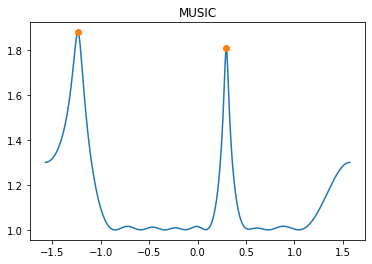

In [44]:
plt.plot(Angles,ps[2])
plt.plot(Angles[DoAsMUS[2]],ps[2][DoAsMUS[2]],'o')
plt.title('MUSIC')
plt.show()

In [45]:
import tensorflow as tf

In [46]:
inputs = tf.keras.layers.Input((N,N,3))
x = tf.keras.layers.Conv2D(256,(5,5), activation='relu',name="cnn_1", padding='same')(inputs)
x = tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=True)(x)
x = tf.keras.layers.ReLU(max_value=None, negative_slope=0, threshold=0)(x)
x = tf.keras.layers.Conv2D(256,(5,5), activation='relu',name="cnn_2", padding='same')(x)
x = tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=True)(x)
x = tf.keras.layers.ReLU(max_value=None, negative_slope=0, threshold=0)(x)
x = tf.keras.layers.Conv2D(256,(3,3), activation='relu',name="cnn_4", padding='same')(x)
x = tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=True)(x)
x = tf.keras.layers.ReLU(max_value=None, negative_slope=0, threshold=0)(x)
x = tf.keras.layers.Conv2D(256,(3,3), activation='relu',name="cnn_5", padding='same')(x)
x = tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=True)(x)
x = tf.keras.layers.ReLU(max_value=None, negative_slope=0, threshold=0)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Softmax(axis=-1)(x)
out = tf.keras.layers.Dense(360, activation = 'linear', name = 'output')(x)

In [47]:
model = tf.keras.Model(inputs = [inputs], outputs = [out])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-08)
model.compile(optimizer=optimizer, loss='mse',metrics=['mean_squared_error'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 10, 3)]       0         
_________________________________________________________________
cnn_1 (Conv2D)               (None, 10, 10, 256)       19456     
_________________________________________________________________
layer_normalization_8 (Layer (None, 10, 10, 256)       20        
_________________________________________________________________
re_lu_8 (ReLU)               (None, 10, 10, 256)       0         
_________________________________________________________________
cnn_2 (Conv2D)               (None, 10, 10, 256)       1638656   
_________________________________________________________________
layer_normalization_9 (Layer (None, 10, 10, 256)       20        
_________________________________________________________________
re_lu_9 (ReLU)               (None, 10, 10, 256)       0   

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', patience=5,verbose=1, mode='min')]

In [49]:
result = model.fit(Xu,psindB, epochs =100, batch_size=128, shuffle = True,callbacks=callbacks,
                  verbose = 1,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 226s 28ms/sample - loss: 0.4964 - mean_squared_error: 0.4964 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 2/100
8000/8000 [==============================] - 226s 28ms/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1554 - val_mean_squared_error: 0.1554
Epoch 3/100
8000/8000 [==============================] - 224s 28ms/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 4/100
8000/8000 [==============================] - 225s 28ms/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.1583 - val_mean_squared_error: 0.1583
Epoch 5/100
8000/8000 [==============================] - 225s 28ms/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 6/100
8000/8000 [==============================] - 225s 28ms/sample - loss: 0.0115 - mean_square

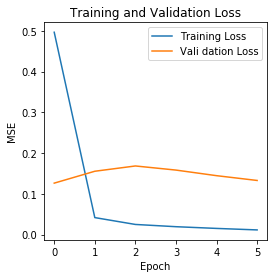

In [50]:
figsize=4,4
figure,ax=plt.subplots(figsize=figsize)
plt.plot(result.history['mean_squared_error'],label='Training Loss')
plt.plot(result.history['val_mean_squared_error'],label='Vali dation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
DOA = np.array([30,60])/180 # random source directions
DOA

array([0.16666667, 0.33333333])

In [66]:
for iter in range(snapshots):
    data = np.zeros(N)
    for i in range(L):
        asv = np.exp(1j*2*np.pi*np.random.rand(1))
        data = data + asv*noise[i]*array_steering_vector(array,DOA[i])
    X[:,iter] = data + (1 /snr)*(np.random.randn(N)+np.random.randn(N)*1j)
CovMattest = X@X.conj().transpose()
CovMattest.shape

(10, 10)

In [67]:
start_time=time.time()
Xutest=np.zeros((N,N,3))
Xutest[:,:,0]=np.real(CovMattest)
Xutest[:,:,1]=np.imag(CovMattest)
Xutest[:,:,2]=np.angle(CovMattest)
Xutest=np.expand_dims(Xutest,axis=0)
Xutest.shape

predictions = model.predict(Xutest)

end_time=time.time()
print(end_time-start_time)

0.024932384490966797


In [68]:
pred=predictions.reshape(360,)
pred.shape

(360,)

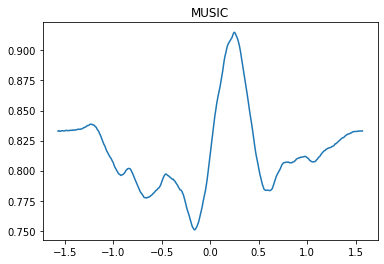

In [69]:
plt.plot(Angles,pred)
plt.title('MUSIC')
plt.show()

In [70]:
start_time=time.time()
DoAsMUSIC , psindB = music(CovMattest,L,N,array,Angles)
end_time=time.time()
print(end_time-start_time)

0.026924848556518555


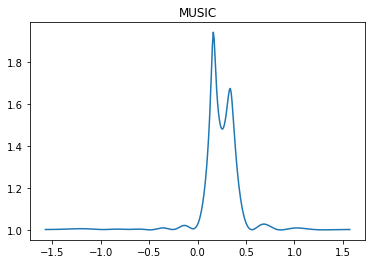

In [71]:
plt.plot(Angles,psindB)
plt.title('MUSIC')
plt.show()